In [43]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(forcats))

dir <- "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))

load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

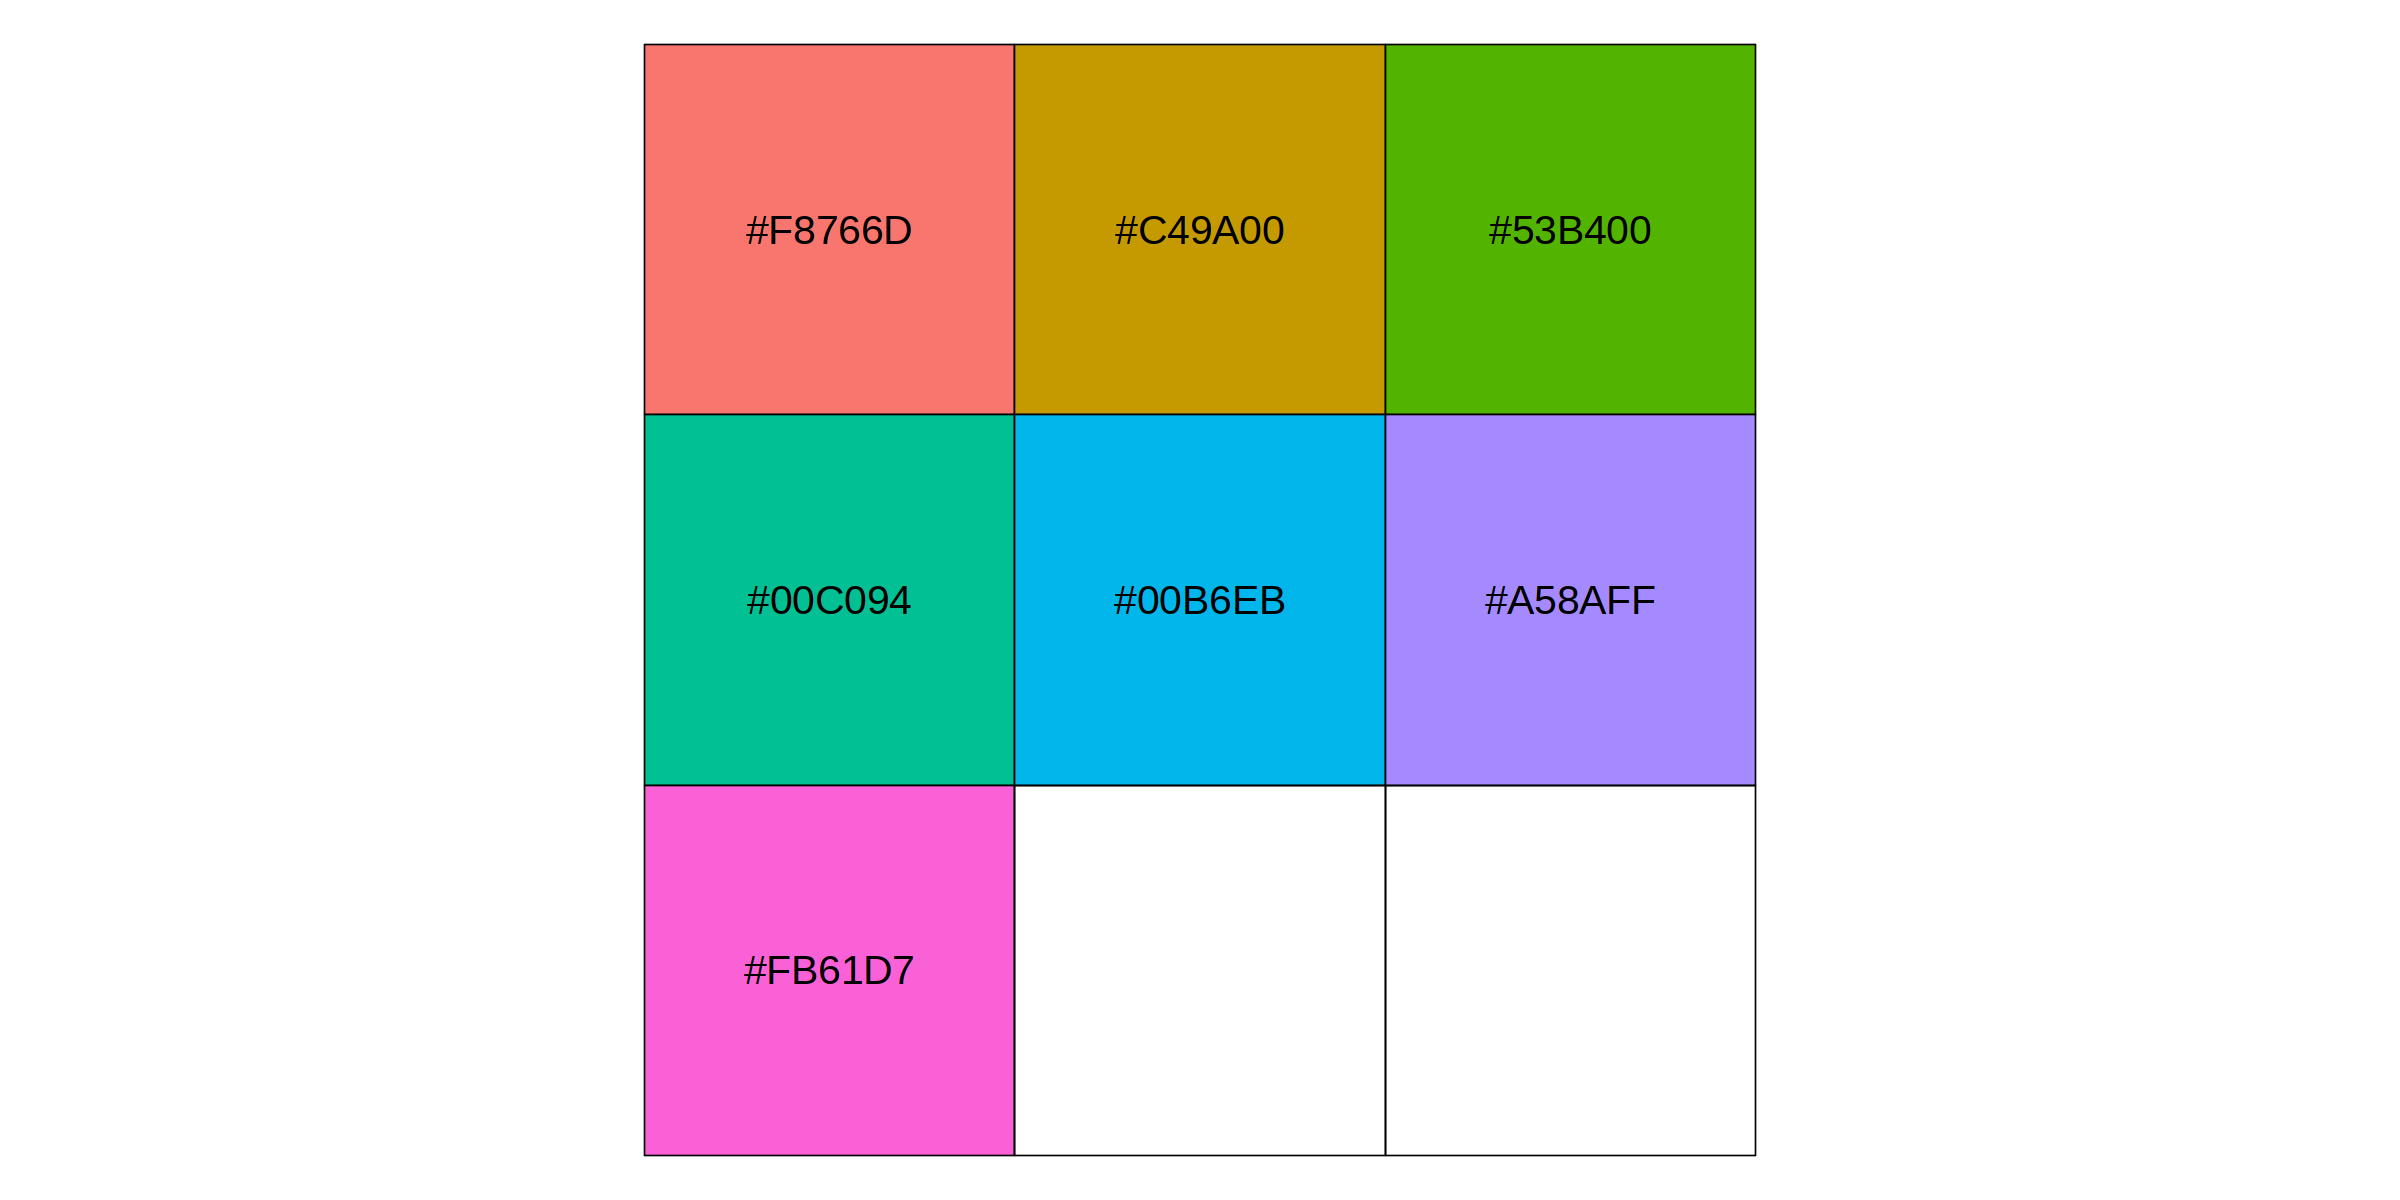

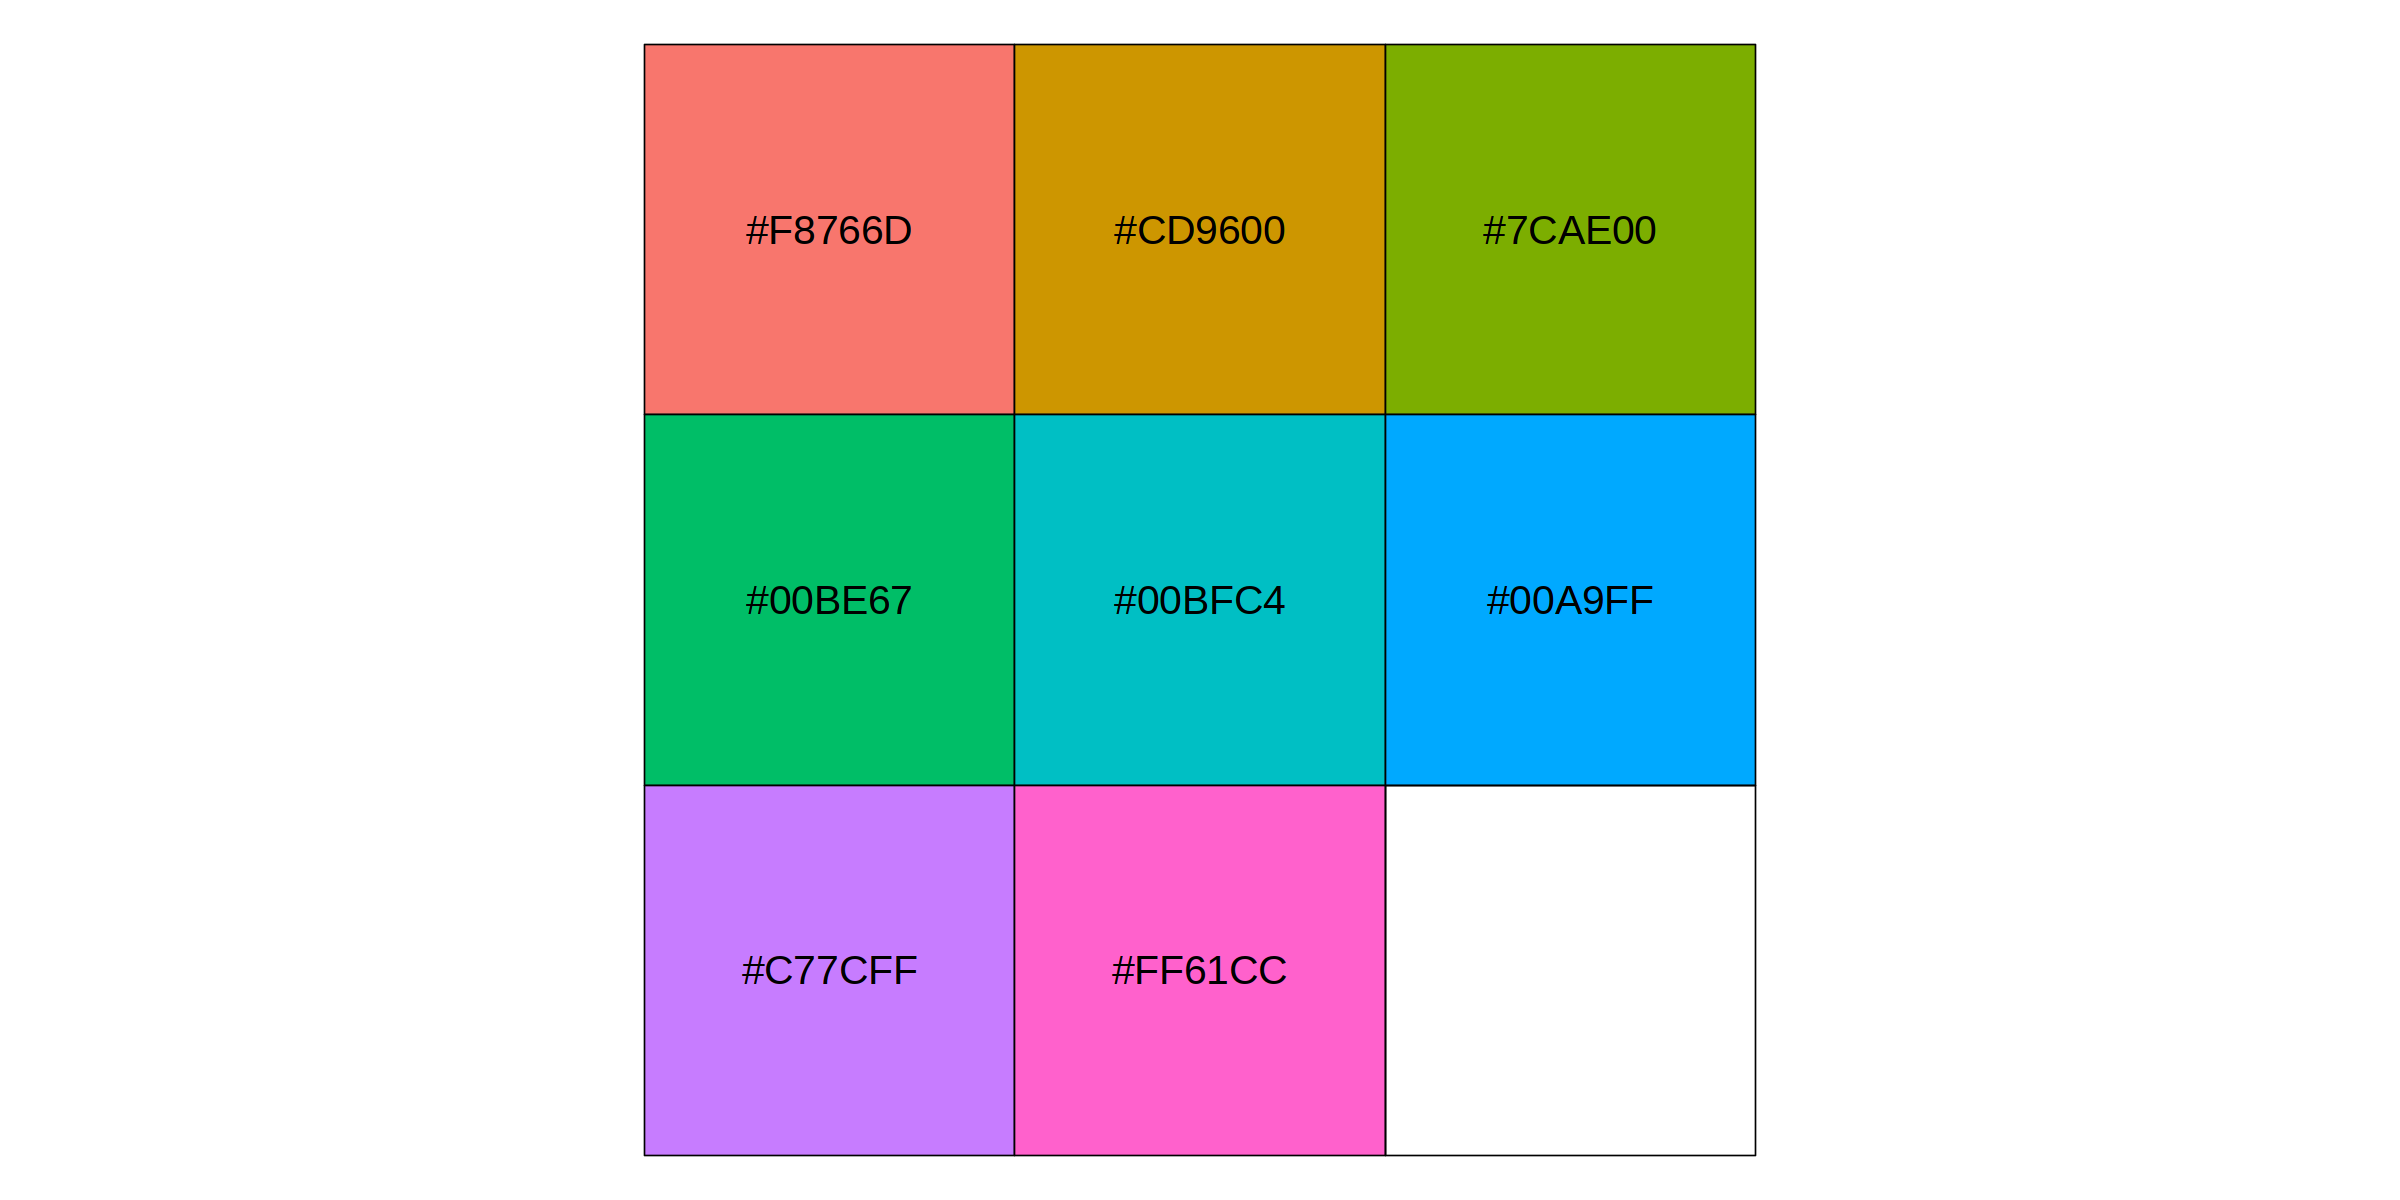

In [42]:
scales::show_col(scales::hue_pal()(7), cex_label = 2)
scales::show_col(scales::hue_pal()(8), cex_label = 2)

In [44]:
colValues <- c("Cons" = "#F8766D",
               "Mean" = "#C49A00",
                "ConsFilt" = "#53B400",
                "ConsFiltES" = "#00C094",
                "AC" = "#00B6EB"
              )

In [45]:
pL <- list()
bWs <- c(0.08,0.15,0.25)
size <- 20
f2 <- function(dfn) {
for(t in seq(2,5)) {
    dd <- dfn %>% filter(depth==t)
    if(t <= 4) {
        pL[[t-1]] <- ggplot(dd, aes(x=nGenes, fill = TypeUp, colour = TypeUp)) + 
        geom_histogram(position = "dodge", alpha=0.7, binwidth=bWs[t-1]) + 
#         geom_histogram(position = "dodge", binwidth = 0.2) + 
        scale_y_continuous(trans='log10', expand = c(0,0)) + coord_cartesian(ylim = c(1, 1e5)) +
        scale_x_continuous(trans='log2') +
        labs(fill="Type", color="Type") +
        ggtitle(paste("Height", t, sep="=")) +
#         facet_wrap(vars(depth)) +
        theme_bw() +
        theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust=0.5),
             axis.text = element_text(size = size), legend.text = element_text(size = size)) +
        xlab("Number of Genes") +
        ylab("Number of Nodes") +
        scale_color_manual(values = colValues) +
        scale_fill_manual(values = colValues)
    }
    else {
            bins <- c(1,2,4,16,128,1024,16384)
            dfN <- data.frame(Type = c(), nodes= c(), nGenes = c())
            for(j in seq(bins)) {
                start <- ifelse(j==1,0,bins[j-1])
                end <- bins[j]
                print(dim(dfN))
                print(j)
                dfT <- dd %>% filter(nGenes > start & nGenes <= end) %>% group_by(Type) %>% summarize(nodes=n())
                dfT2 <- dd %>% filter(nGenes > start & nGenes <= end) %>% group_by(TypeUp) %>% summarize(nodes=n())
                miss <- setdiff(dfn$Type, dfT$Type)
                if(length(miss) > 0) {
                    dfT <- rbind(dfT, data.frame(Type=miss, nodes=1))
                    dfT2 <- rbind(dfT2, data.frame(TypeUp=miss, nodes=1))
                }

                dfN <- rbind(dfN, cbind(dfT2, nGenes = rep(bins[j],5)))
#                 dfN$TypeUp <- factor(dfN$Type, levels = intersect(ord, dfN$Type))
           }
            pL[[t-1]] <- ggplot(dfN, aes(x=nGenes, y=nodes, fill=TypeUp, color = TypeUp)) + 
                    geom_bar(stat="identity", position="dodge", width = 0.8, alpha=0.7) +
                    scale_y_continuous(trans='log10') +
                    scale_x_continuous(trans='log2') +
                    ggtitle(paste("Height", t, sep=">=")) +
                    theme_bw() +
                    theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust=0.5), 
                         axis.text = element_text(size = size), legend.text = element_text(size = size)) +
                    labs(fill="Type", color="Type") +
                    xlab("Number of Genes") +
                    ylab("Number of Nodes") +
                    scale_color_manual(values = colValues) +
                    scale_fill_manual(values = colValues)
                    
    }
    
}
    pL
}


In [46]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5

head(dfNGenes$Type)
ord <- c("Cons", "Mean", "ConsFilt", "ConsFiltES", "AC")
dfNGenes$TypeUp <-  factor(dfNGenes$Type, levels = ord)
head(dfNGenes)
levels(dfNGenes$TypeUp)
# dfNGenes[order(dfNGenes$TypeUp),]

[1] "ConsFilt" "ConsFilt" "ConsFilt" "ConsFilt" "ConsFilt" "ConsFilt"

,Type,nGenes,depth,TypeUp
,<chr>,<int>,<dbl>,<fct>
1,ConsFilt,1,5,ConsFilt
2,ConsFilt,1,5,ConsFilt
3,ConsFilt,1,5,ConsFilt
4,ConsFilt,1,4,ConsFilt
5,ConsFilt,1,3,ConsFilt
6,ConsFilt,1,2,ConsFilt


[1] "Cons"       "Mean"       "ConsFilt"   "ConsFiltES" "AC"

[1] 0 0
[1] 1
[1] 5 3
[1] 2
[1] 10  3
[1] 3
[1] 15  3
[1] 4
[1] 20  3
[1] 5
[1] 25  3
[1] 6
[1] 30  3
[1] 7


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


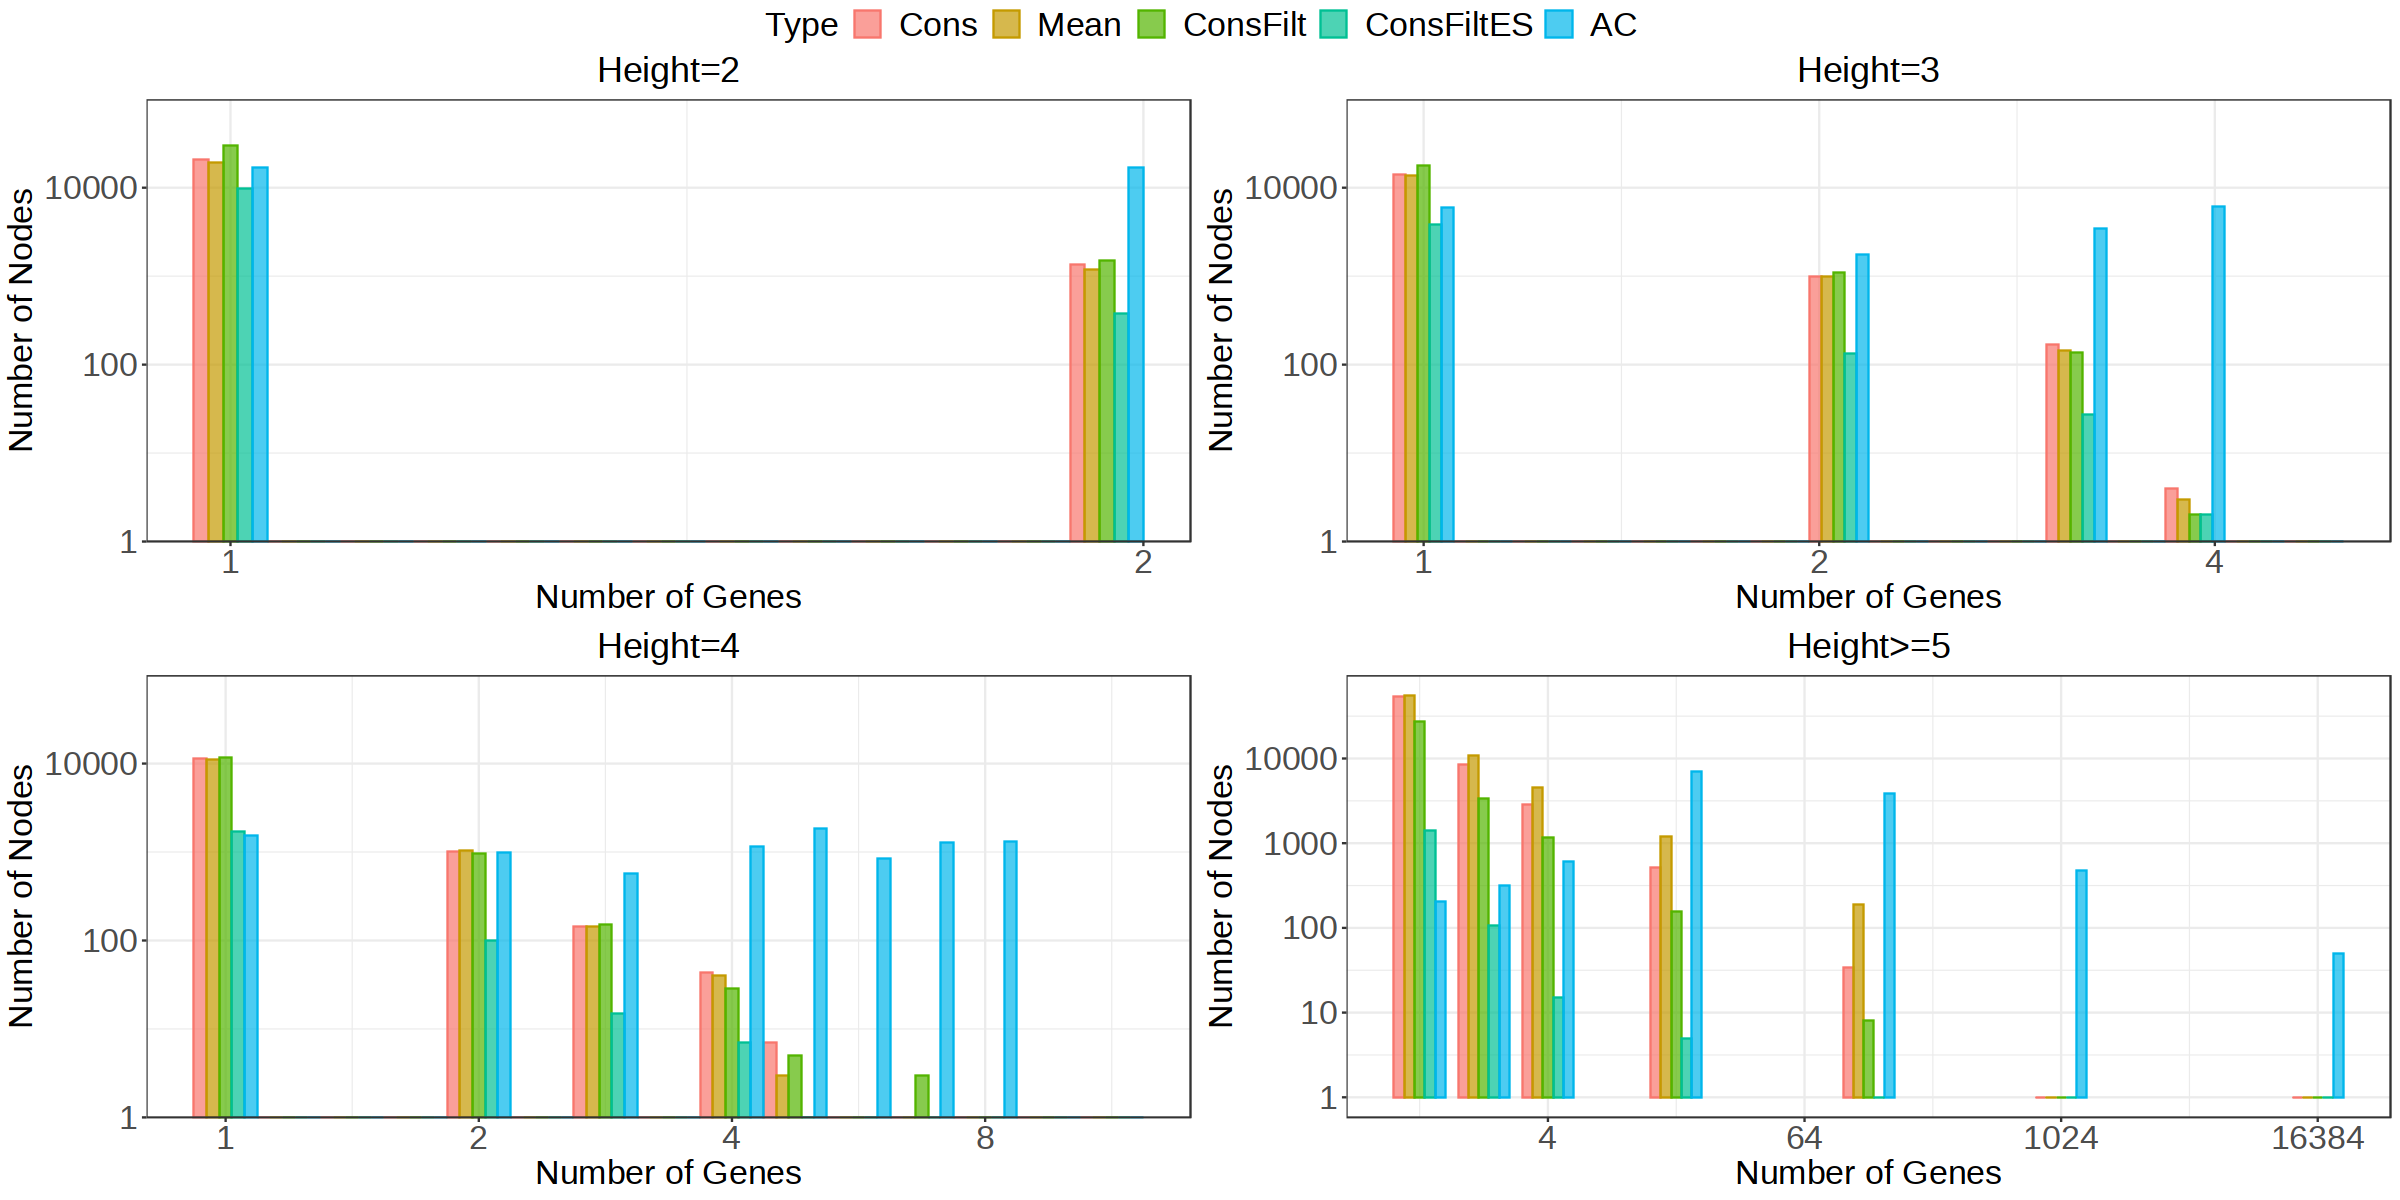

In [47]:
pL <- f2(dfNGenes)
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

#### Brain Sim Low

In [48]:
dir <- "environment/brain_sim_nodtu_lowfc/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))

load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [49]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5
dfNGenes$TypeUp <-  factor(dfNGenes$Type, levels = ord)

[1] 0 0
[1] 1
[1] 5 3
[1] 2
[1] 10  3
[1] 3
[1] 15  3
[1] 4
[1] 20  3
[1] 5
[1] 25  3
[1] 6
[1] 30  3
[1] 7


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


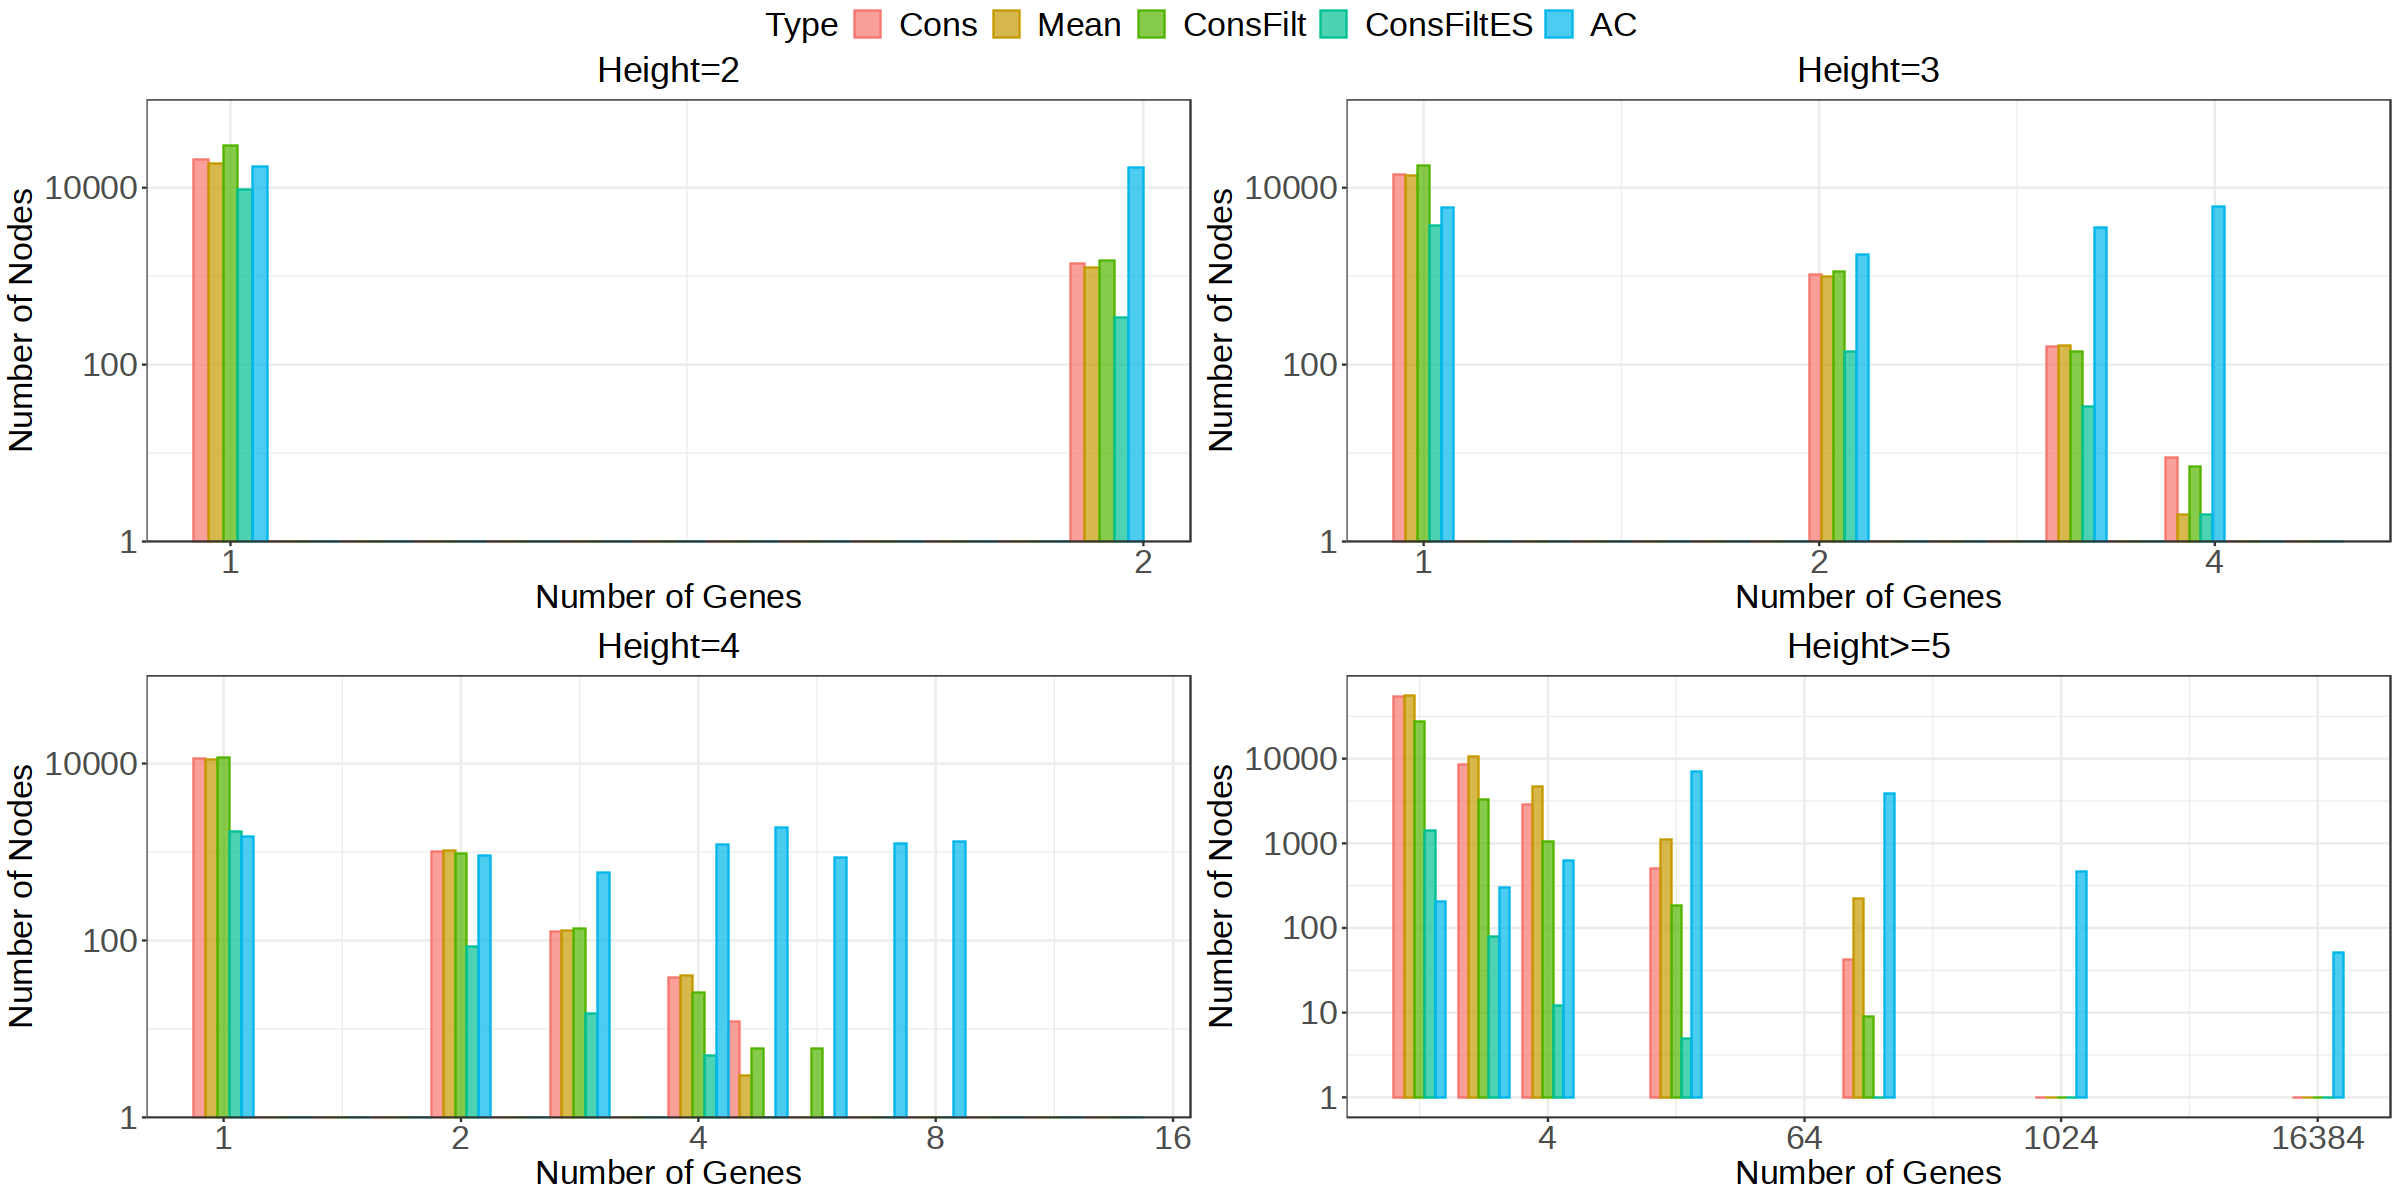

In [50]:
pL <- f2(dfNGenes)
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

#### Mouse Dataset

In [51]:
dir <- "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))

load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [52]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5
dfNGenes$TypeUp <-  factor(dfNGenes$Type, levels = ord)

[1] 0 0
[1] 1
[1] 5 3
[1] 2
[1] 10  3
[1] 3
[1] 15  3
[1] 4
[1] 20  3
[1] 5
[1] 25  3
[1] 6
[1] 30  3
[1] 7


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


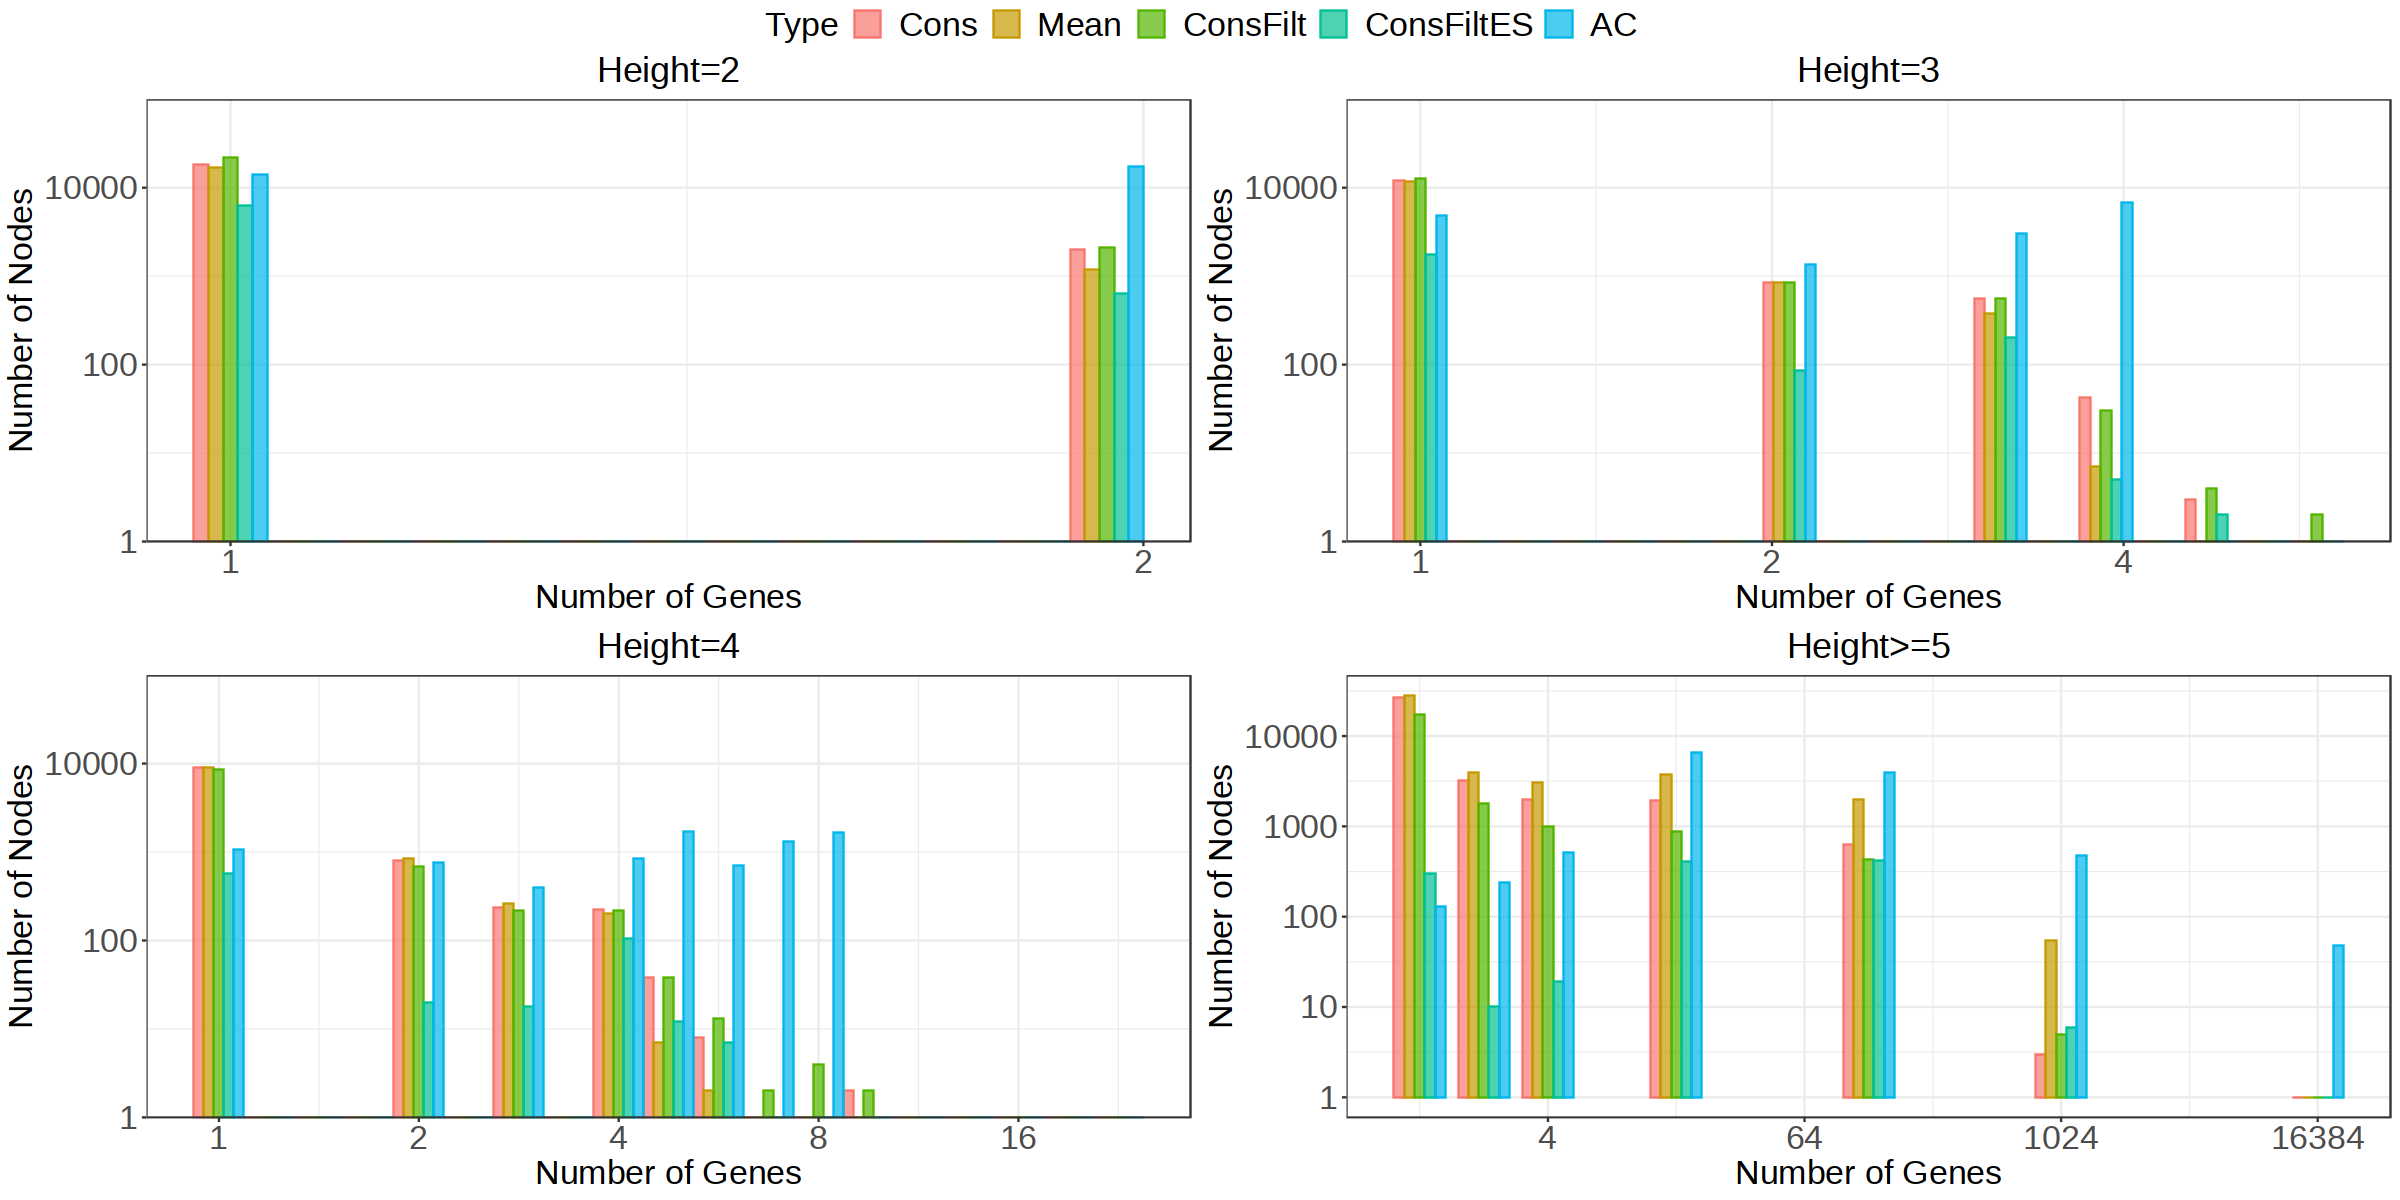

In [53]:
pL <- f2(dfNGenes)
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

In [141]:
# pL <- list()
# bWs <- c(0.08,0.15,0.25)
# size <- 20
# for(t in seq(2,5)) {
#     dd <- dfNGenes %>% filter(depth==t)
#     if(t <= 4) {
#         pL[[t-1]] <- ggplot(dd, aes(x=nGenes, fill = Type, colour = Type)) + 
#         geom_histogram(position = "dodge", alpha=0.7, binwidth=bWs[t-1]) + 
# #         geom_histogram(position = "dodge", binwidth = 0.2) + 
#         scale_y_continuous(trans='log10', expand = c(0,0)) + coord_cartesian(ylim = c(1, 1e5)) +
#         scale_x_continuous(trans='log2') +
#         ggtitle(paste("Height", t, sep="=")) +
# #         facet_wrap(vars(depth)) +
#         theme_bw() +
#         theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust = 0.5), 
#              axis.text = element_text(size = size), legend.text = element_text(size = size)) +
#         xlab("Number of Genes") +
#         ylab("Number of Nodes")
#     }
#     else {
#             bins <- c(1,2,4,16,128,1024,16384)
#             dfN <- data.frame(Type = c(), nodes= c(), nGenes = c())
#             for(j in seq(bins)) {
#                 start <- ifelse(j==1,0,bins[j-1])
#                 end <- bins[j]
#                 dfT <- dd %>% filter(nGenes > start & nGenes <= end) %>% group_by(Type) %>% summarize(nodes=n())
#                 miss <- setdiff(dfNGenes$Type, dfT$Type)
#                 if(length(miss) > 0)
#                     dfT <- rbind(dfT, data.frame(Type=miss, nodes=1))
#                 dfN <- rbind(dfN, cbind(dfT, nGenes = rep(bins[j],5)))
#            }
#             pL[[t-1]] <- ggplot(dfN, aes(x=nGenes, y=nodes, fill=Type, color = Type)) + 
#                     geom_bar(stat="identity", position="dodge", width = 0.8, alpha=0.7) +
#                     scale_y_continuous(trans='log10') +
#                     scale_x_continuous(trans='log2') +
#                     ggtitle(paste("Height", t, sep=">=")) +
#                     theme_bw() +
#                     theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust = 0.5),
#                          axis.text = element_text(size = size), legend.text = element_text(size = size)) + 
#                     xlab("Number of Genes") +
#                     ylab("Number of Nodes")
                    
#     }
    
# }


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


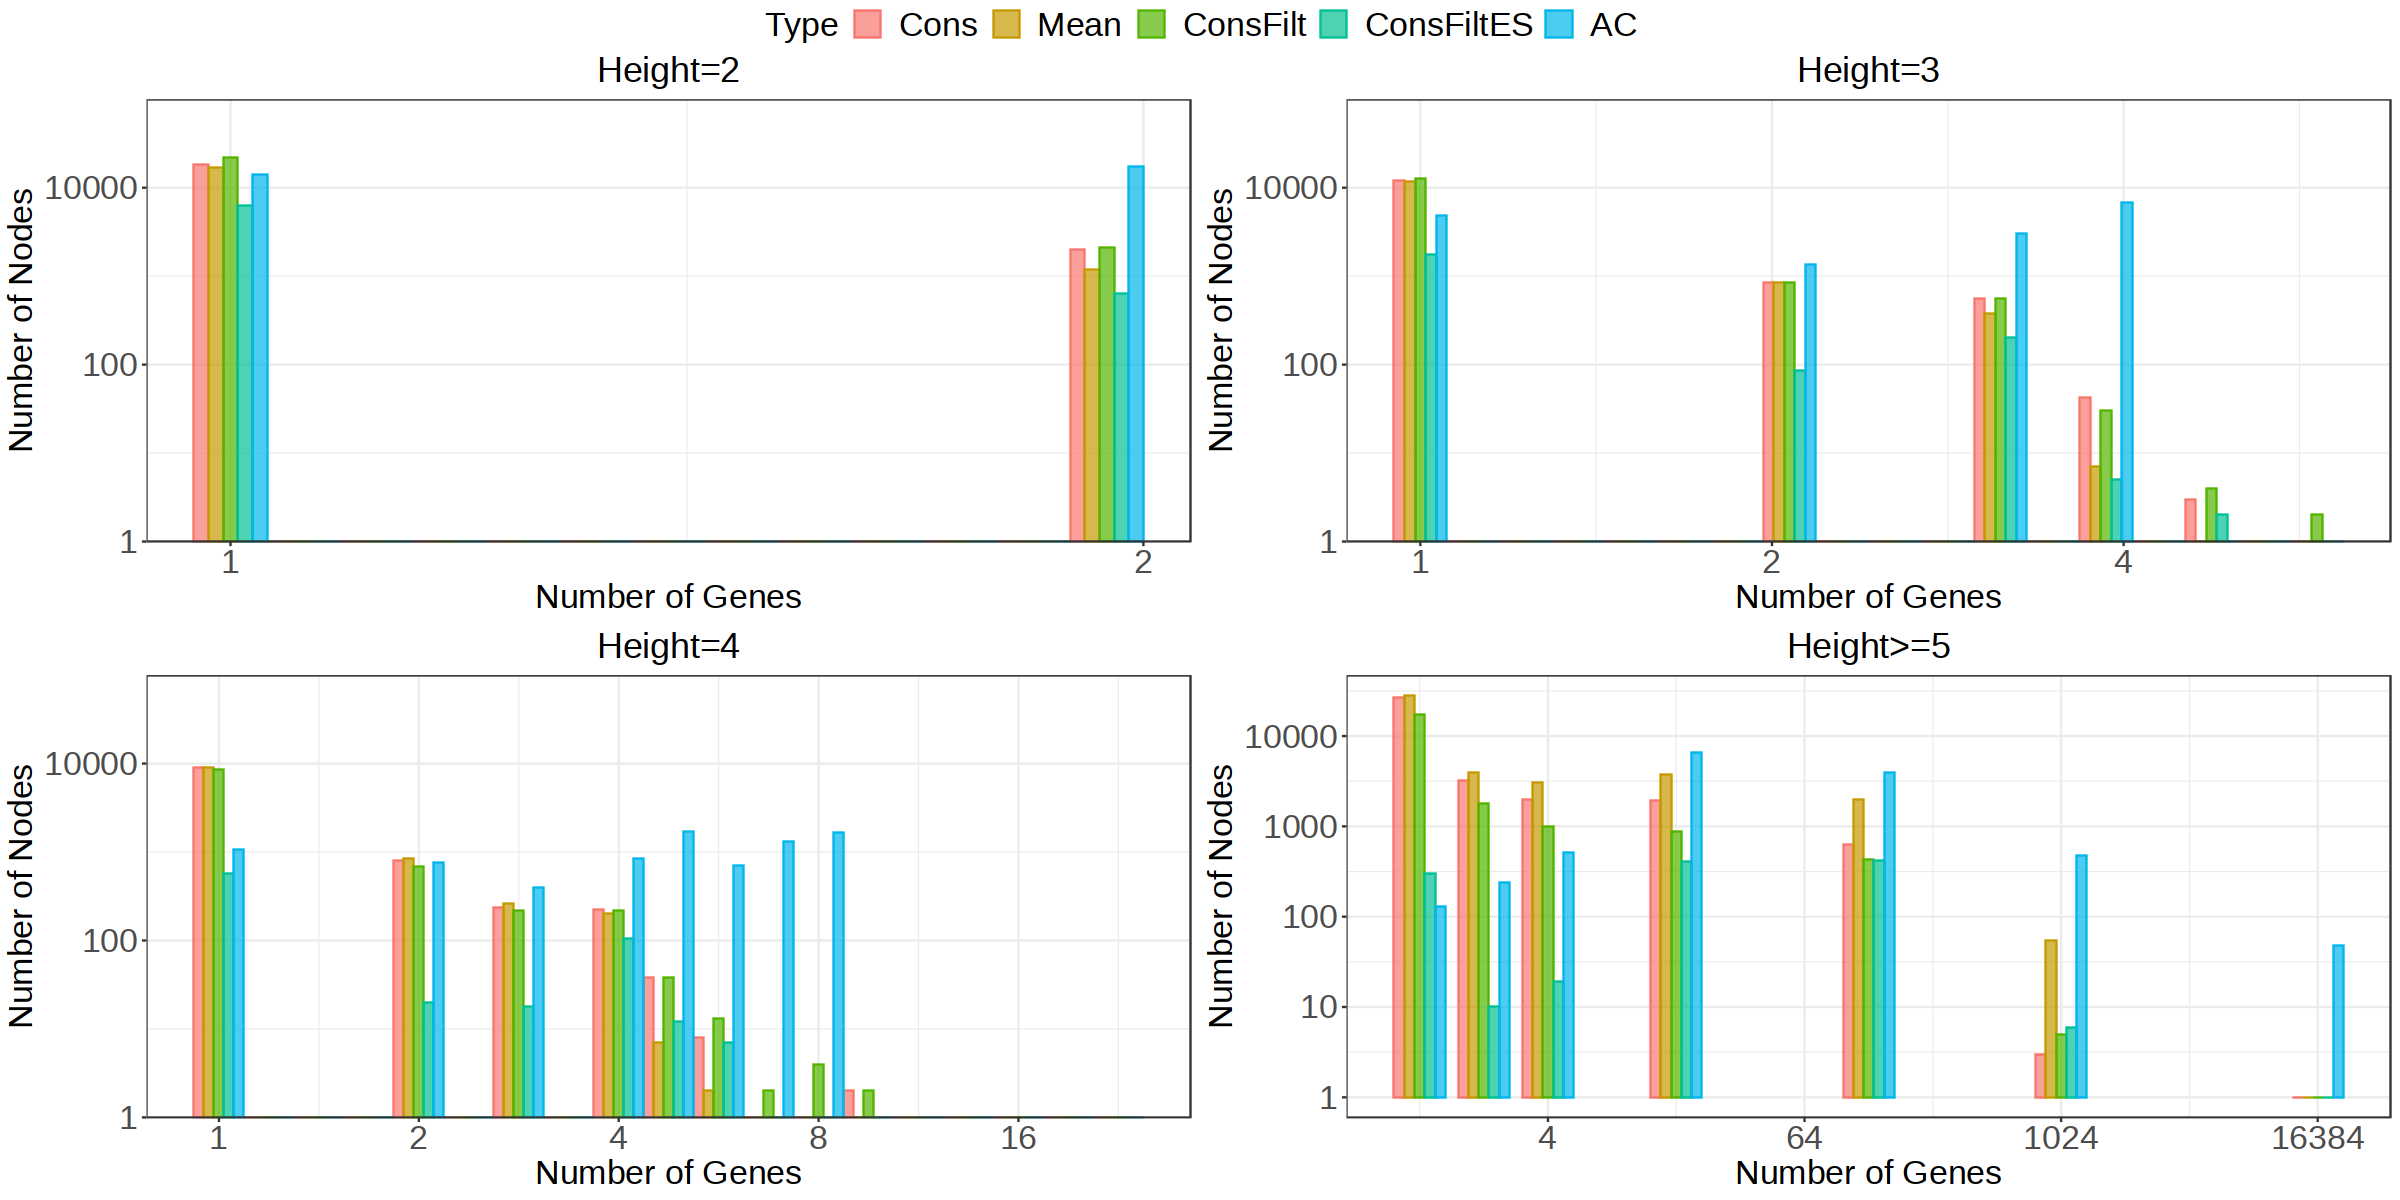

In [54]:
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

#### Chimp Dataset

In [55]:
dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100//tree_analysis"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))

load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [56]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5
dfNGenes$TypeUp <-  factor(dfNGenes$Type, levels = ord)

[1] 0 0
[1] 1
[1] 5 3
[1] 2
[1] 10  3
[1] 3
[1] 15  3
[1] 4
[1] 20  3
[1] 5
[1] 25  3
[1] 6
[1] 30  3
[1] 7


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


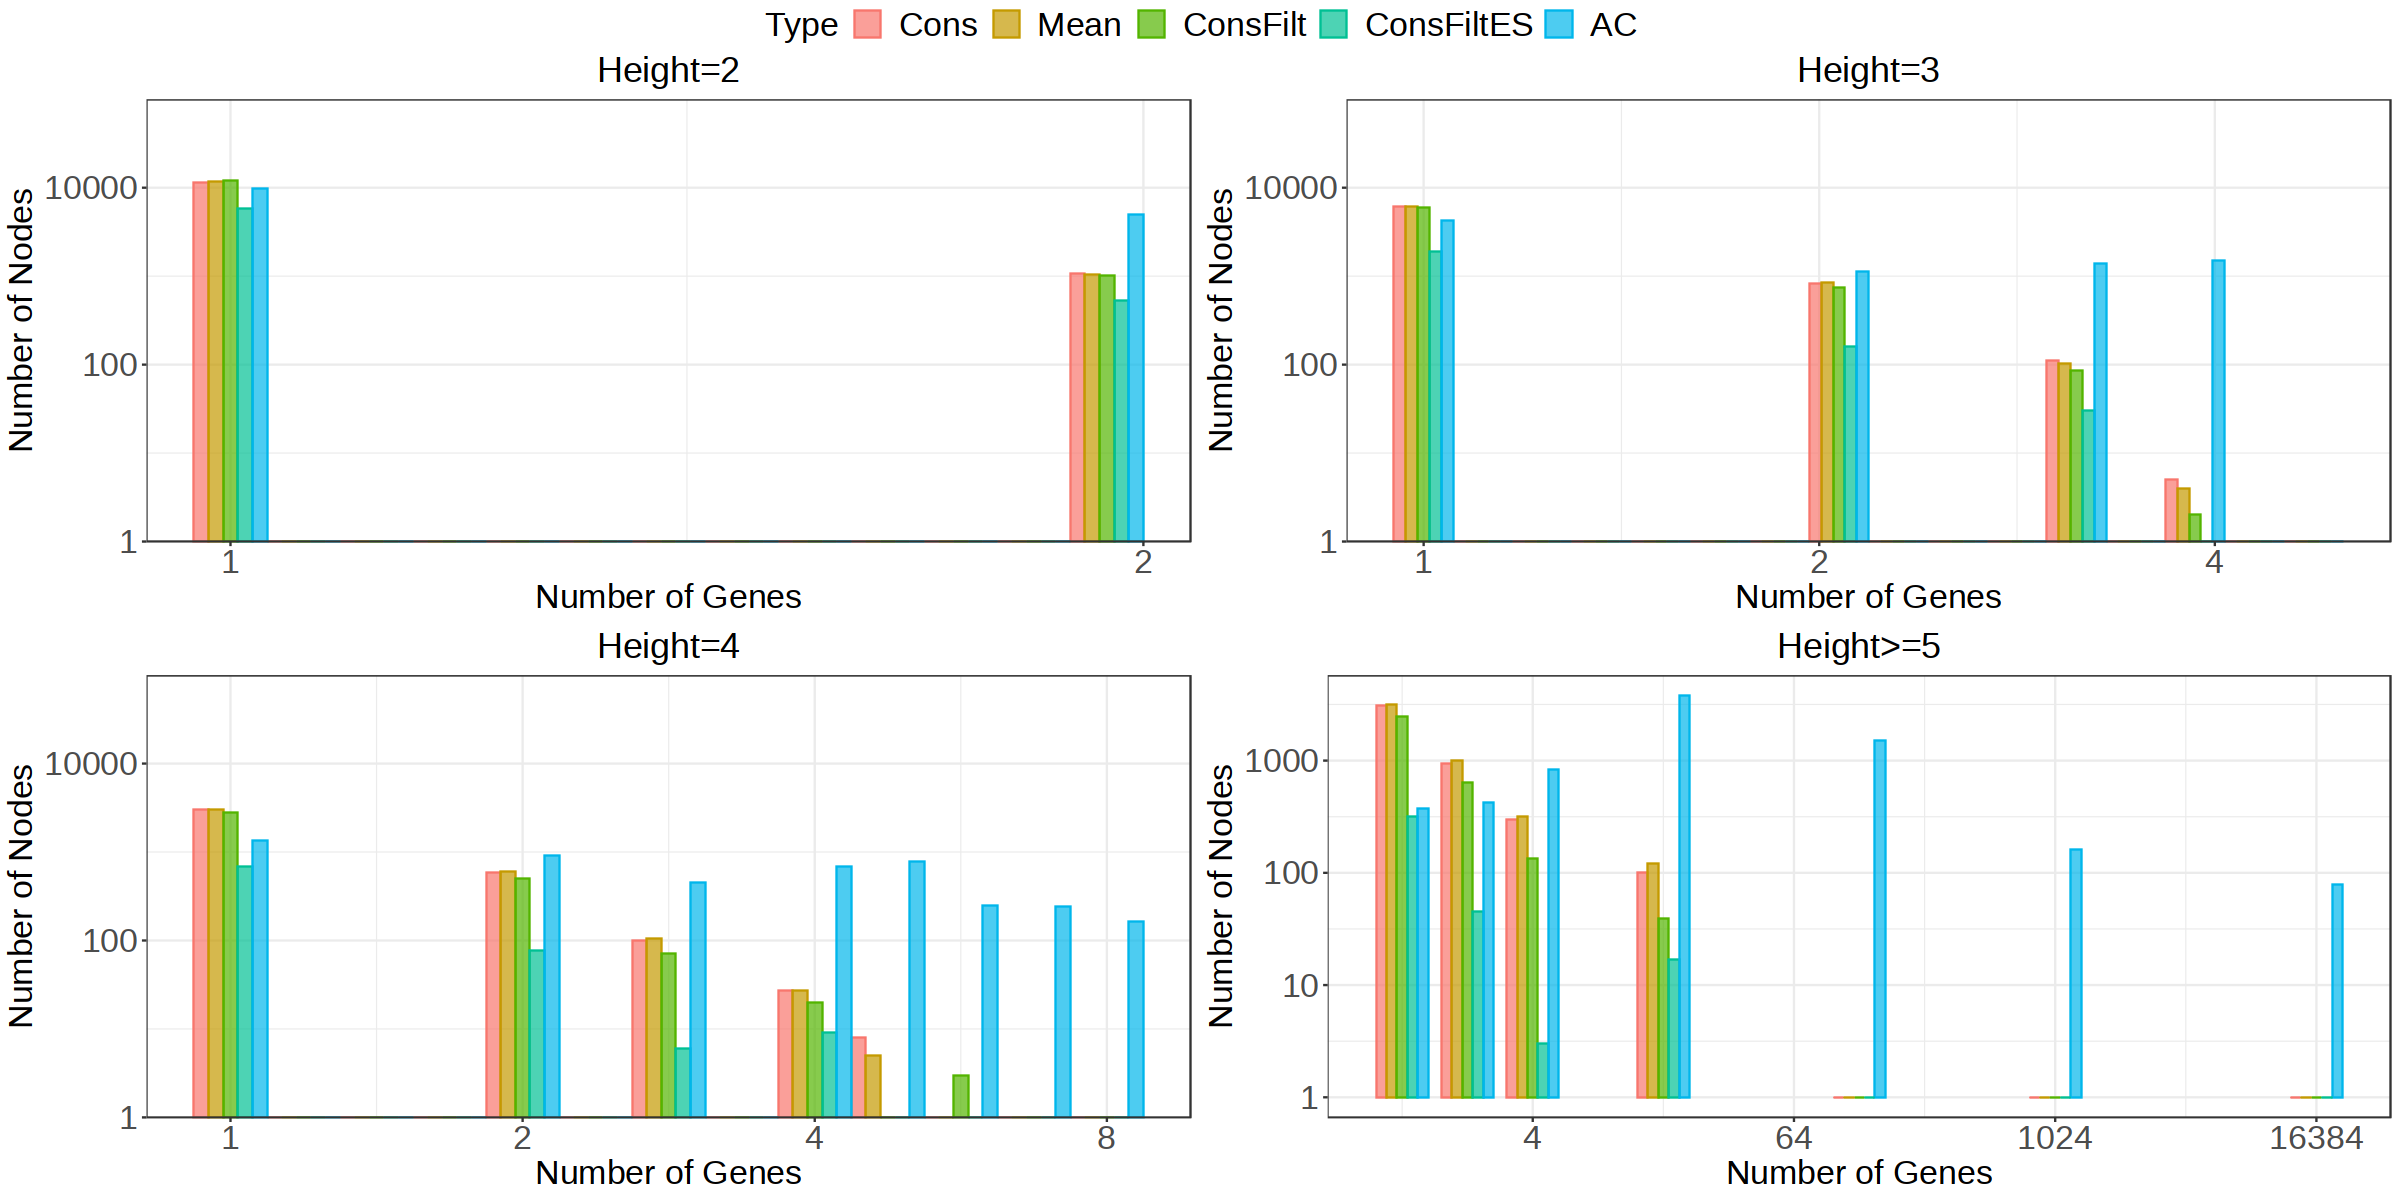

In [57]:
pL <- f2(dfNGenes)
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

In [15]:
pL <- list()
bWs <- c(0.08,0.15,0.25)
size <- 20
for(t in seq(2,5)) {
    dd <- dfNGenes %>% filter(depth==t)
    if(t <= 4) {
        pL[[t-1]] <- ggplot(dd, aes(x=nGenes, fill = Type, colour = Type)) + 
        geom_histogram(position = "dodge", alpha=0.7, binwidth=bWs[t-1]) + 
#         geom_histogram(position = "dodge", binwidth = 0.2) + 
        scale_y_continuous(trans='log10', expand = c(0,0)) + coord_cartesian(ylim = c(1, 1e5)) +
        scale_x_continuous(trans='log2') +
        ggtitle(paste("Height", t, sep="=")) +
#         facet_wrap(vars(depth)) +
        theme_bw() +
        theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust=0.5),
            axis.text = element_text(size = size), legend.text = element_text(size = size)) +
        xlab("Number of Genes") +
        ylab("Number of Nodes")
    }
    else {
            bins <- c(1,2,4,16,128,1024,16384)
            dfN <- data.frame(Type = c(), nodes= c(), nGenes = c())
            for(j in seq(bins)) {
                start <- ifelse(j==1,0,bins[j-1])
                end <- bins[j]
                dfT <- dd %>% filter(nGenes > start & nGenes <= end) %>% group_by(Type) %>% summarize(nodes=n())
                miss <- setdiff(dfNGenes$Type, dfT$Type)
                if(length(miss) > 0)
                    dfT <- rbind(dfT, data.frame(Type=miss, nodes=1))
                dfN <- rbind(dfN, cbind(dfT, nGenes = rep(bins[j],5)))
           }
            pL[[t-1]] <- ggplot(dfN, aes(x=nGenes, y=nodes, fill=Type, color = Type)) + 
                    geom_bar(stat="identity", position="dodge", width = 0.8, alpha=0.7) +
                    scale_y_continuous(trans='log10') +
                    scale_x_continuous(trans='log2') +
                    ggtitle(paste("Height", t, sep=">=")) +
                    theme_bw() +
                    theme(text = element_text(size = size), plot.title = element_text(size=size+1, hjust=0.5), 
                          axis.text = element_text(size = size), legend.text = element_text(size = size)) +
                    xlab("Number of Genes") +
                    ylab("Number of Nodes")
                    
    }
    
}


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


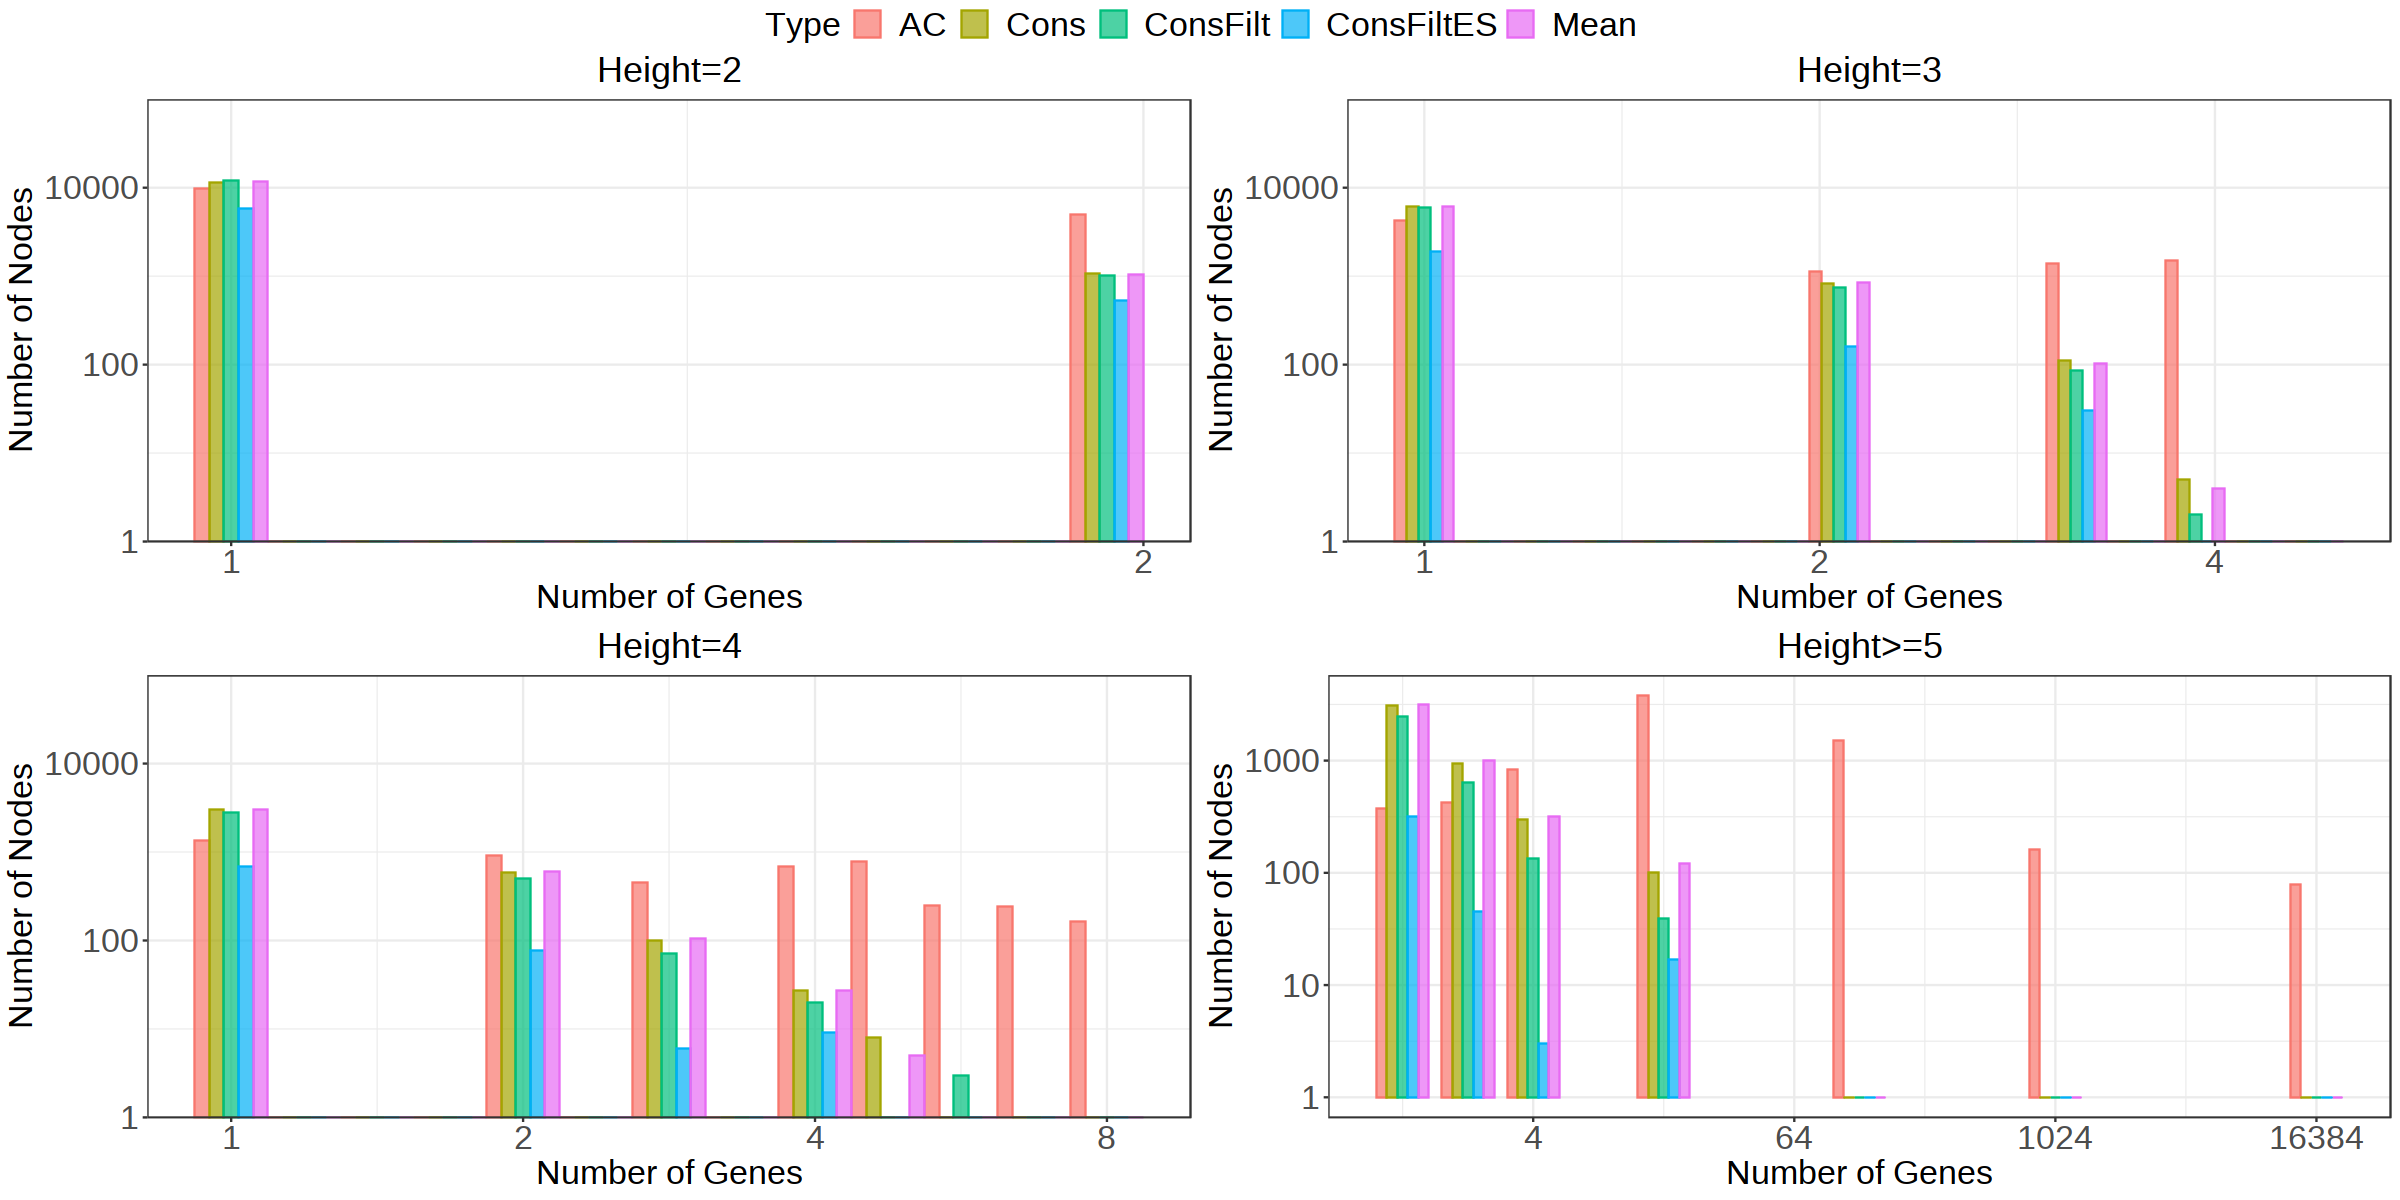

In [16]:
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

In [18]:
dfNGenes %>% filter(Type=="Cons", depth>=5, nGenes >= 10) %>% dim

[1] 8 3